In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Ridge:
    def __init__(self, alpha):
        self.alpha = alpha
        
    def fit(self, X, y):
        leftmat = np.linalg.inv(X.T @ X + self.alpha * np.identity(X.shape[1]))
        self.betas = leftmat @ X.T @ y
    
    def predict(self, X):
        return X @ self.betas

In [3]:
train = pd.read_csv('train_cleaned.csv')

In [4]:
x = train.values[:, :-2]
y = train.values[:, -2]
y = y.reshape((1456,1))
x = np.insert(x, 0, 1, axis=1)
x_just_for_col_name = train.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [5]:
reg=Ridge(alpha = 0.6)

In [97]:
reg.fit(x,y)

In [98]:
reg.predict(x)

array([[12.23236865],
       [12.14662164],
       [12.28548585],
       ...,
       [12.57307601],
       [11.87452952],
       [11.96183276]])

In [99]:
reg.predict(x)-y

array([[-0.01532567],
       [ 0.03761071],
       [-0.03168084],
       ...,
       [ 0.07994649],
       [ 0.01006729],
       [ 0.06024931]])

In [100]:
np.sqrt(sum((reg.predict(x)-y)**2 )/len(y))

array([0.1054397])

In [104]:
reg.betas

array([[ 9.24733287e-01],
       [-7.46804480e-03],
       [ 7.31166473e-02],
       [ 4.49086710e-02],
       [-6.66119577e-02],
       [ 1.63948784e-02],
       [-9.48049914e-03],
       [ 7.55436251e-03],
       [-3.17130592e-03],
       [ 5.61757867e-03],
       [-3.55806737e-03],
       [ 4.99071830e-02],
       [ 2.21695034e-02],
       [-4.14586782e-02],
       [-6.27372882e-03],
       [ 2.83973826e-02],
       [ 2.44532988e-02],
       [-5.84293925e-02],
       [ 1.50526857e-02],
       [-7.22999345e-04],
       [ 1.72148372e-02],
       [ 4.57909014e-02],
       [ 1.25179371e-01],
       [ 1.06363080e-01],
       [ 3.69132656e-02],
       [-5.24143368e-03],
       [ 1.15209673e-02],
       [ 6.70125723e-01],
       [ 1.31759639e-02],
       [-1.81829459e-02],
       [-7.43283005e-02],
       [ 4.84146281e-03],
       [ 1.22411586e-01],
       [ 4.72690361e-02],
       [ 1.15144376e-02],
       [-8.74576708e-03],
       [ 1.20303854e-02],
       [ 2.20425430e-04],
       [ 2.5

# Coef

In [101]:
coef = pd.Series(reg.betas[1:].reshape(-1), index = x_just_for_col_name.columns)

In [102]:
imp_coef = pd.concat([coef.sort_values()[-1:-21:-1],coef.sort_values()[10::-1]])

Text(0.5,1,'Coefficients in the  Model')

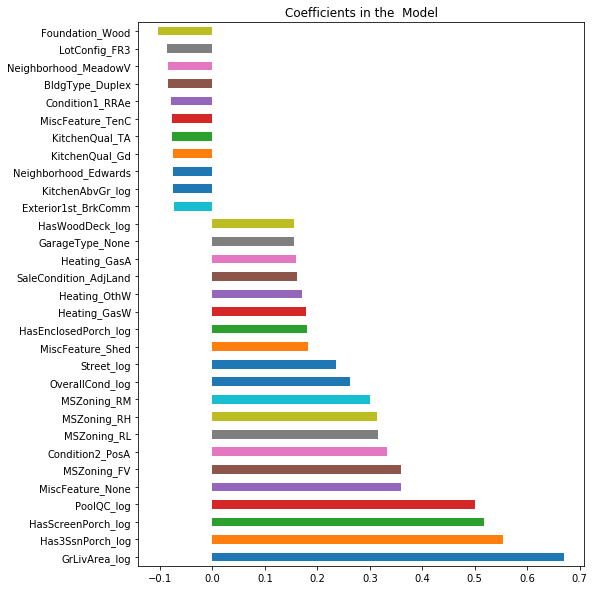

In [103]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the  Model")

# CV

In [9]:
splited_tranining_set_idx = np.load('splited_training_set.npy')
K = 4

In [10]:
CV_score = []
for i in range(K):
    current_train_idx = splited_tranining_set_idx[i][0]
    current_test_idx = splited_tranining_set_idx[i][1]
    X = x[current_train_idx]
    Y = y[current_train_idx]
    
    reg_cur = Ridge(alpha = 1)
    reg_cur.fit(X, Y)
    
    X_ = x[current_test_idx]
    Y_ = reg_cur.predict(X_)
    
    Y_real = y[current_test_idx]
    
    cuurent_score = np.sqrt(sum((Y_ - Y_real)**2)/len(Y_real))
    CV_score += [cuurent_score]

In [11]:
CV_score

[array([0.113426]),
 array([0.15005475]),
 array([0.12956065]),
 array([0.13482057])]

In [12]:
np.mean(CV_score)

0.13196549260668244

In [13]:
0.13196549260668244

0.13196549260668244

In [14]:
def CV(alpha):
    CV_score = []
    for i in range(K):
        current_train_idx = splited_tranining_set_idx[i][0]
        current_test_idx = splited_tranining_set_idx[i][1]
        X = x[current_train_idx]
        Y = y[current_train_idx]
    
        reg_cur = Ridge(alpha = alpha)
        reg_cur.fit(X, Y)
    
        X_ = x[current_test_idx]
        Y_ = reg_cur.predict(X_)
    
        Y_real = y[current_test_idx]
    
        cuurent_score = np.sqrt(sum((Y_ - Y_real)**2)/len(Y_real))
        CV_score += [cuurent_score]
        return np.mean(CV_score)

Text(0,0.5,'RMSE')

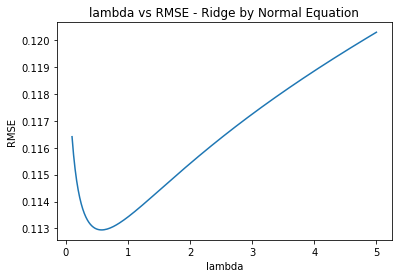

In [9]:
alphas = np.linspace(0.1,5,200)
cv_ridge = [CV(alpha) for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "lambda vs RMSE - Ridge by Normal Equation")
plt.xlabel("lambda")
plt.ylabel("RMSE")

Text(0,0.5,'RMSE')

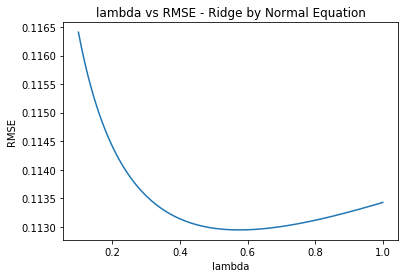

In [15]:
alphas = np.linspace(0.1,1,200)
cv_ridge = [CV(alpha) for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "lambda vs RMSE - Ridge by Normal Equation")
plt.xlabel("lambda")
plt.ylabel("RMSE")